<a href="https://colab.research.google.com/github/sai-sreekhar/EDA_DA_21BDS0387/blob/main/21BDS0387_USArrests_EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.mixture import GaussianMixture
from sklearn.manifold import MDS
from scipy.stats import skew, kurtosis, chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Load the dataset
df = pd.read_csv("/content/USArrests.csv")

In [4]:
# 1. Overview of the Dataset
print("\n--- Overview of the Dataset ---\n")
print("Dataset Head:\n", df.head())
print("\nDataset Ixnfo:\n")
df.info()


--- Overview of the Dataset ---

Dataset Head:
    Murder  Assault  UrbanPop  Rape       State
0    13.2      236        58  21.2     Alabama
1    10.0      263        48  44.5      Alaska
2     8.1      294        80  31.0     Arizona
3     8.8      190        50  19.5    Arkansas
4     9.0      276        91  40.6  California

Dataset Ixnfo:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
 4   State     50 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# 2. Statistical Summary
print("\n--- Statistical Summary ---\n")
df_description = df.describe()
print(df_description)


--- Statistical Summary ---

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


In [6]:
# 3. Checking for Missing Values
print("\n--- Missing Values Count ---\n")
print(df.isna().sum())


--- Missing Values Count ---

Murder      0
Assault     0
UrbanPop    0
Rape        0
State       0
dtype: int64


In [8]:
# 4. Data Types Analysis
# Identify numerical and categorical data
df['State'] = df['State'].astype('category')

# Find columns with data type object or category
categorical_columns = df.select_dtypes(include=['category']).columns
print("\n--- Categorical Variables ---\n", categorical_columns.tolist())

numerical_columns = df.select_dtypes(include=[np.number]).columns
print("\n--- Numerical Variables ---\n", numerical_columns.tolist())


--- Categorical Variables ---
 ['State']

--- Numerical Variables ---
 ['Murder', 'Assault', 'UrbanPop', 'Rape']



--- Univariate Analysis of Numerical Features ---



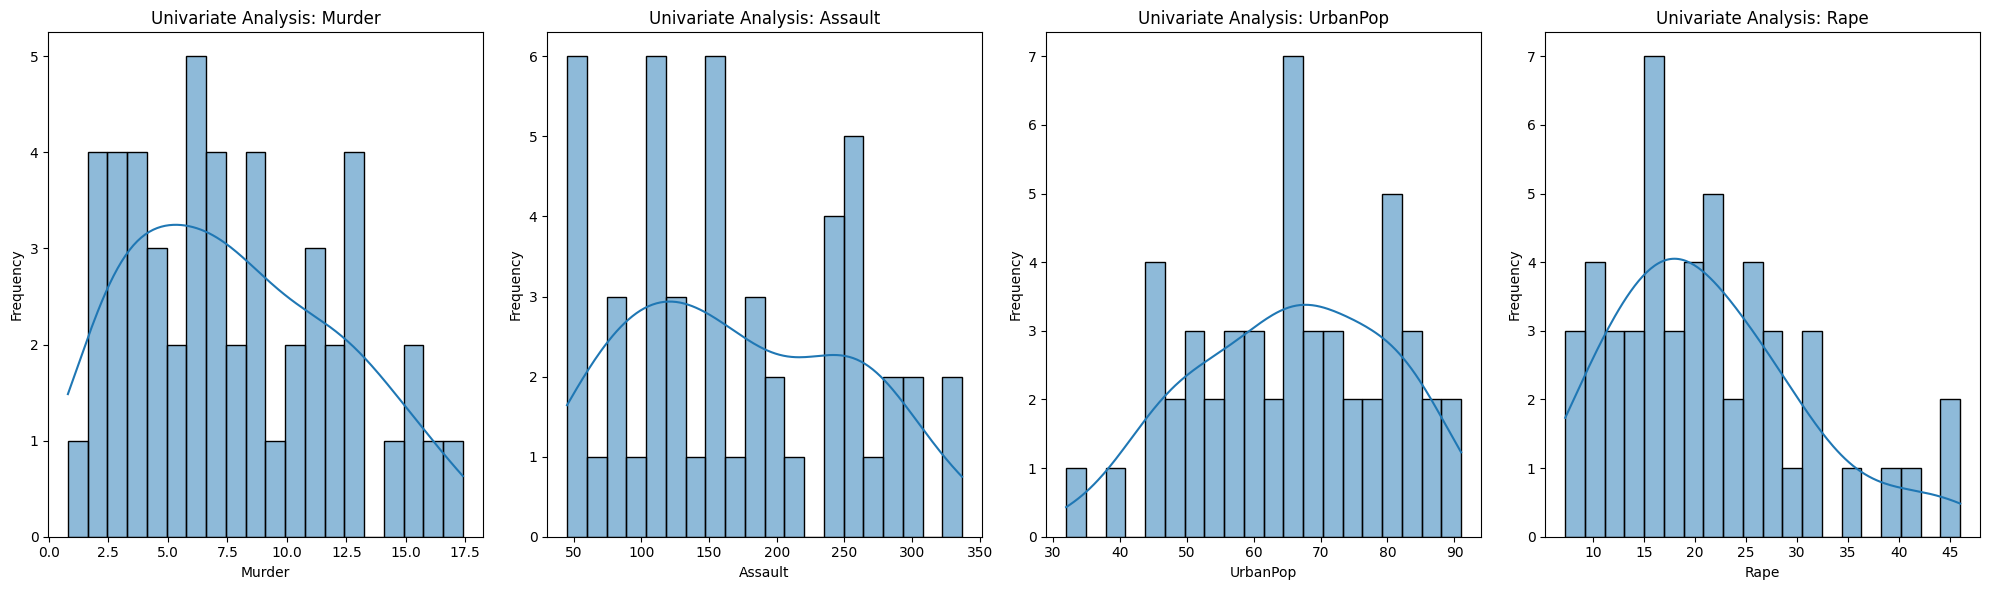

In [9]:
# 5. Univariate Analysis of Numerical Features
print("\n--- Univariate Analysis of Numerical Features ---\n")
num_plots = len(numerical_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 6))

for ax, col in zip(axes, numerical_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Univariate Analysis: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# 6. Skewness and Kurtosis
print("\n--- Skewness and Kurtosis ---\n")
for col in numerical_columns:
    print(f"Skewness of {col}: {skew(df[col])}")
    print(f"Kurtosis of {col}: {kurtosis(df[col])}")


--- Skewness and Kurtosis ---

Skewness of Murder: 0.3820378489719802
Kurtosis of Murder: -0.8646713489582352
Skewness of Assault: 0.2273178665911123
Kurtosis of Assault: -1.069020051573077
Skewness of UrbanPop: -0.2191718705142106
Kurtosis of UrbanPop: -0.7842097458184552
Skewness of Rape: 0.7769613202124208
Kurtosis of Rape: 0.20189779308426514



--- Bivariate Analysis: Numerical Features vs Categorical Features ---



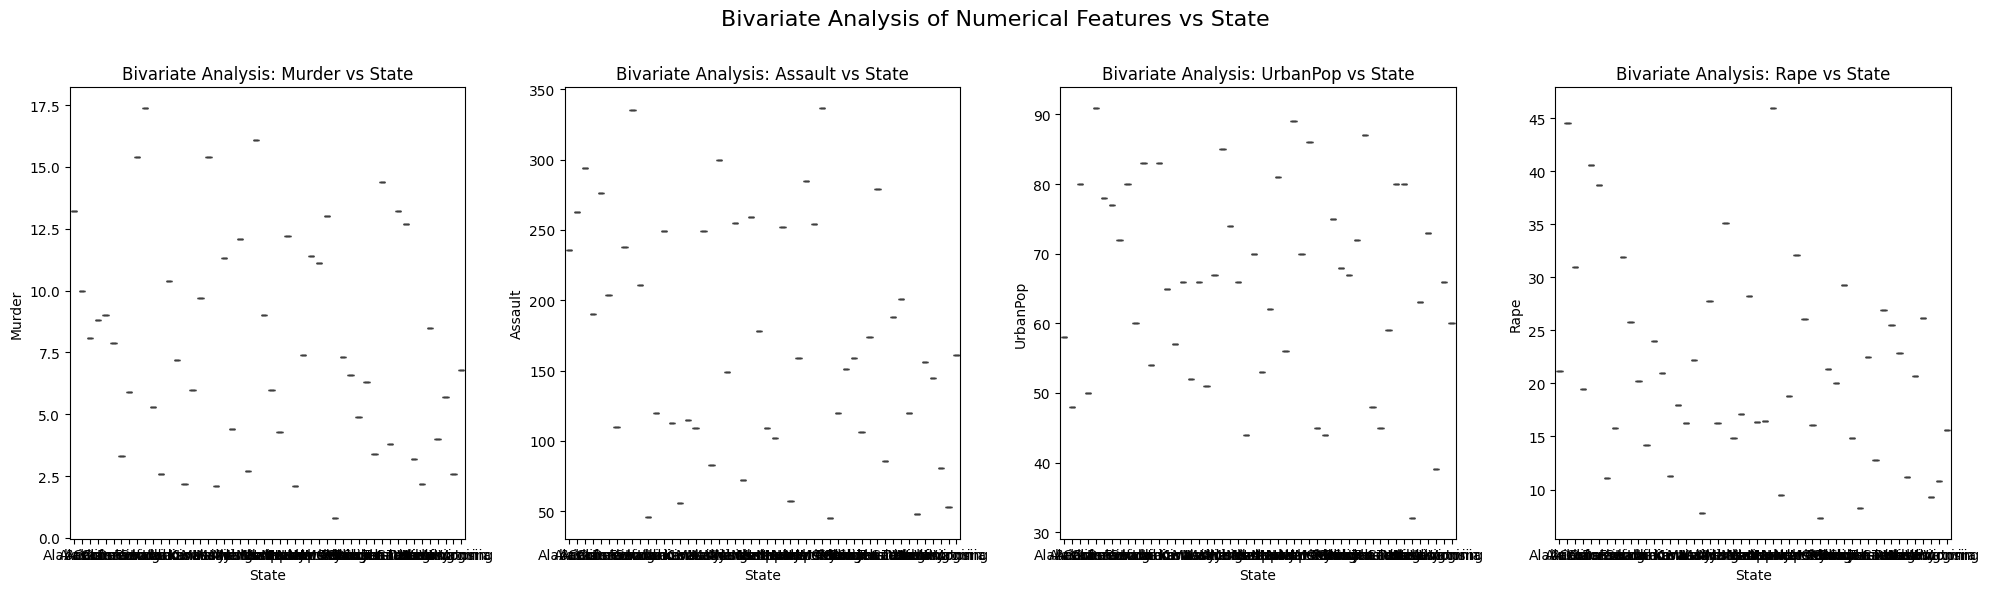

In [12]:
# 7. Bivariate Analysis: Numerical Features vs Categorical Features
print("\n--- Bivariate Analysis: Numerical Features vs Categorical Features ---\n")
categorical_cols = ['State']

# Create subplots for each numerical feature against categorical features
for cat_col in categorical_cols:
    num_plots = len(numerical_columns)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 6))

    for ax, num_col in zip(axes, numerical_columns):
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=ax)
        ax.set_title(f'Bivariate Analysis: {num_col} vs {cat_col}')
        ax.set_ylabel(num_col)

    plt.suptitle(f'Bivariate Analysis of Numerical Features vs {cat_col}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


--- Multivariate Analysis: Correlation Matrix ---



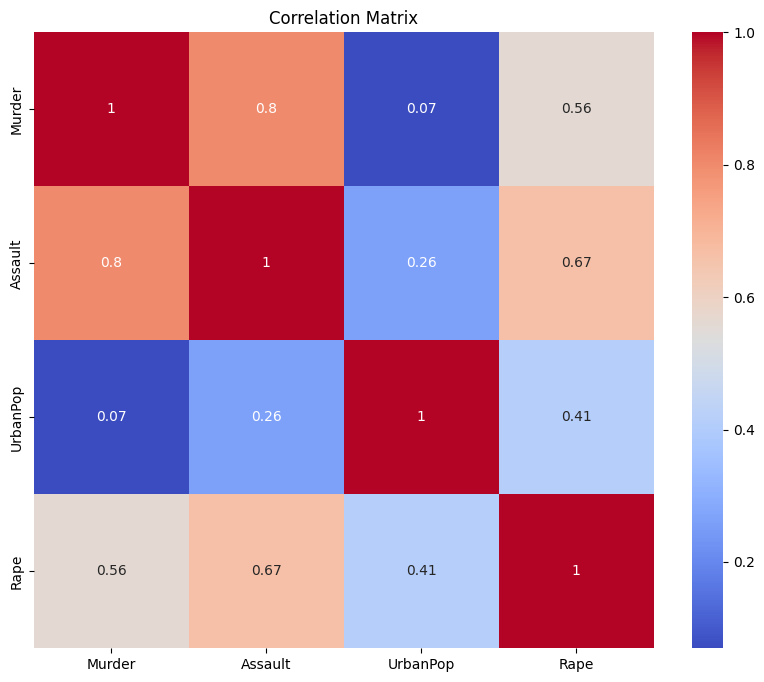

In [13]:
# 8. Multivariate Analysis
# Correlation Matrix - Dropping categorical columns to avoid errors
print("\n--- Multivariate Analysis: Correlation Matrix ---\n")
correlation_matrix = df.drop(columns=categorical_columns).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


--- Pairplot of Numerical Features ---



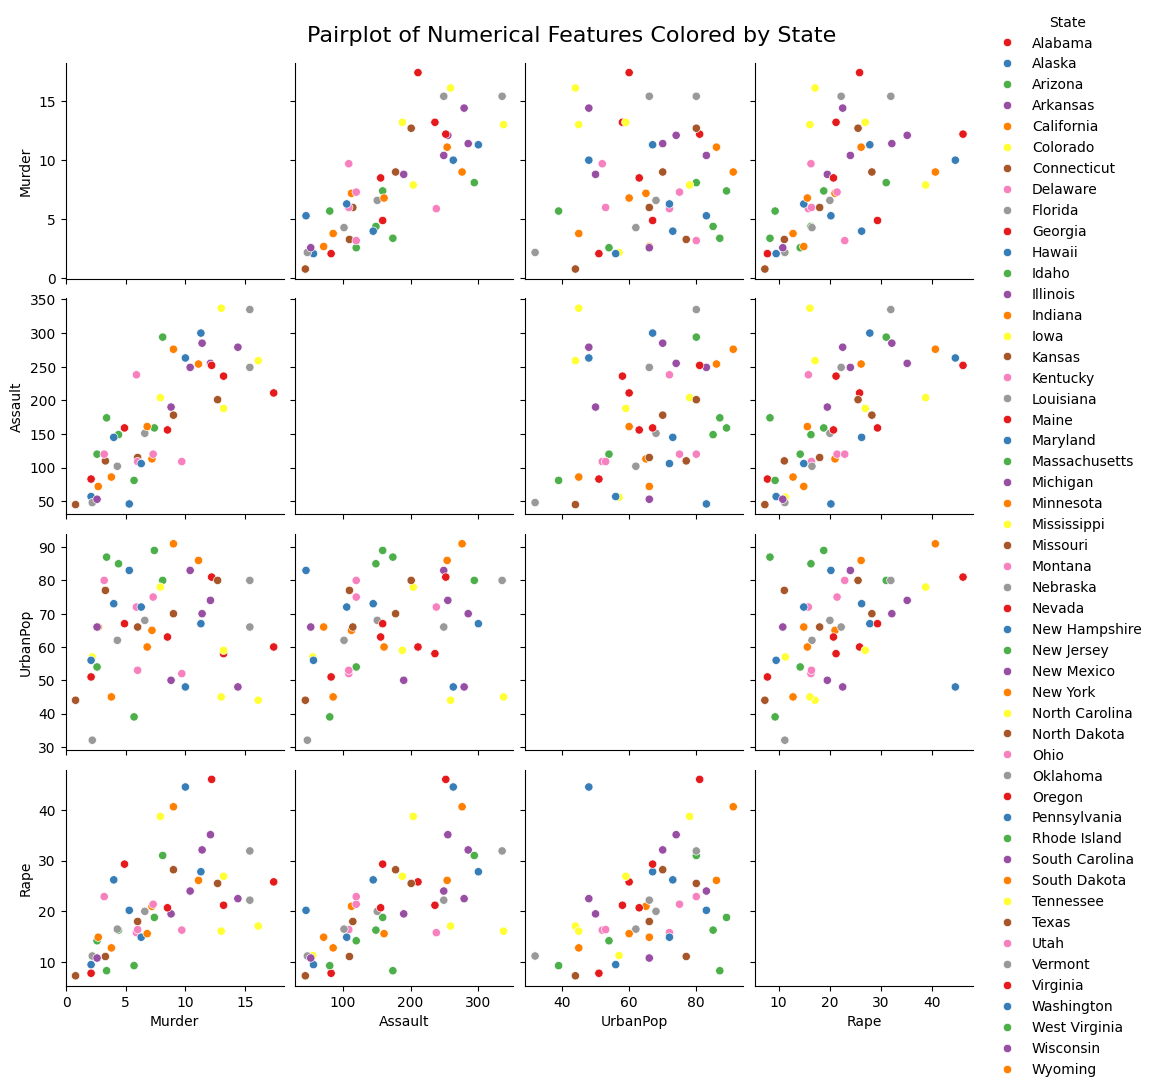

In [14]:
# 9. Pairplot of Numerical Features
print("\n--- Pairplot of Numerical Features ---\n")
pairplot = sns.pairplot(df, vars=numerical_columns, hue='State', palette='Set1')
plt.suptitle('Pairplot of Numerical Features Colored by State', fontsize=16, y=1.02)
plt.show()

In [15]:
# 10. Data Transformation
print("\n--- Data Transformation ---\n")
# Deduplication
print("\nChecking for Duplicate Rows...")
duplicates_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)

# Replacing values - Example: Replace missing values with column mean
print("\nReplacing Missing Values with Column Means...")
for col in numerical_columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)


--- Data Transformation ---


Checking for Duplicate Rows...
Number of duplicate rows: 0

Replacing Missing Values with Column Means...


In [16]:
# 11. Discretization and Binning
print("\n--- Discretization and Binning ---\n")
# Example: Binning 'Murder' into 3 bins
df['Murder_binned'] = pd.cut(df['Murder'], bins=3, labels=['Low', 'Medium', 'High'])
print("\nBinning 'Murder' Column:\n", df[['Murder', 'Murder_binned']].head())


--- Discretization and Binning ---


Binning 'Murder' Column:
    Murder Murder_binned
0    13.2          High
1    10.0        Medium
2     8.1        Medium
3     8.8        Medium
4     9.0        Medium


In [17]:
# 12. Handling Missing Data
print("\n--- Handling Missing Data ---\n")
missing_values = df.isnull().sum().sum()
print(f"Total Missing Values in Dataset: {missing_values}")


--- Handling Missing Data ---

Total Missing Values in Dataset: 0


In [18]:
# Traditional Method - Filling with Mean
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Final check for missing values
print("\nFinal Check for Missing Values:\n", df.isnull().sum())


Final Check for Missing Values:
 Murder           0
Assault          0
UrbanPop         0
Rape             0
State            0
Murder_binned    0
dtype: int64


In [19]:
# Maximum Likelihood Estimation (MLE) - Note: Example as MLE implementation can be complex
# Here, we demonstrate using pandas fillna as a simple example
df_mle = df.copy()
for col in numerical_columns:
    if df_mle[col].isnull().sum() > 0:
        df_mle[col].fillna(df_mle[col].mean(), inplace=True)


--- Pairplot of Numerical Features with Binning ---



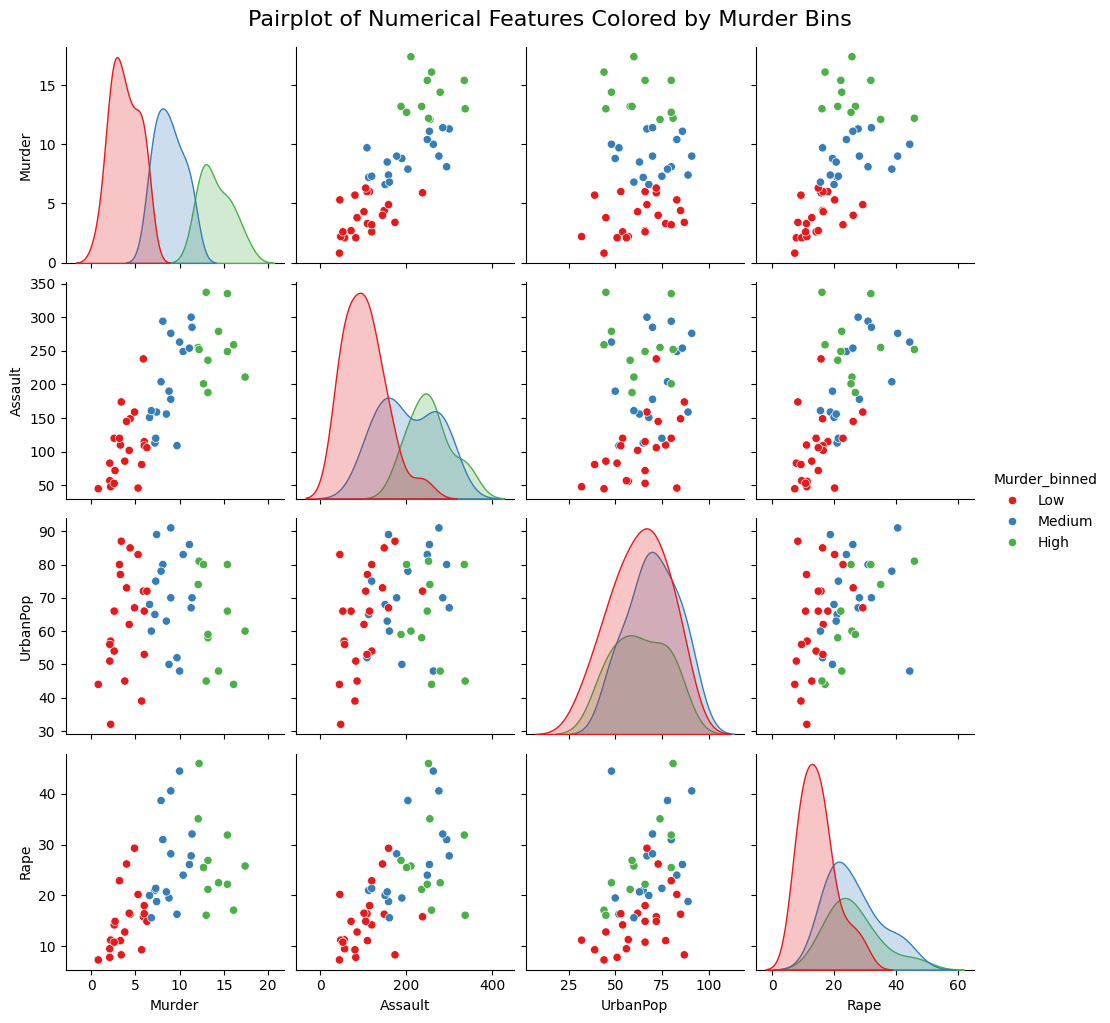

In [20]:
# 13. Pairplot of Numerical Features with Binning
print("\n--- Pairplot of Numerical Features with Binning ---\n")
pairplot = sns.pairplot(df, vars=numerical_columns, hue='Murder_binned', palette='Set1')
plt.suptitle('Pairplot of Numerical Features Colored by Murder Bins', fontsize=16, y=1.02)
plt.show()


--- Time Series Analysis ---



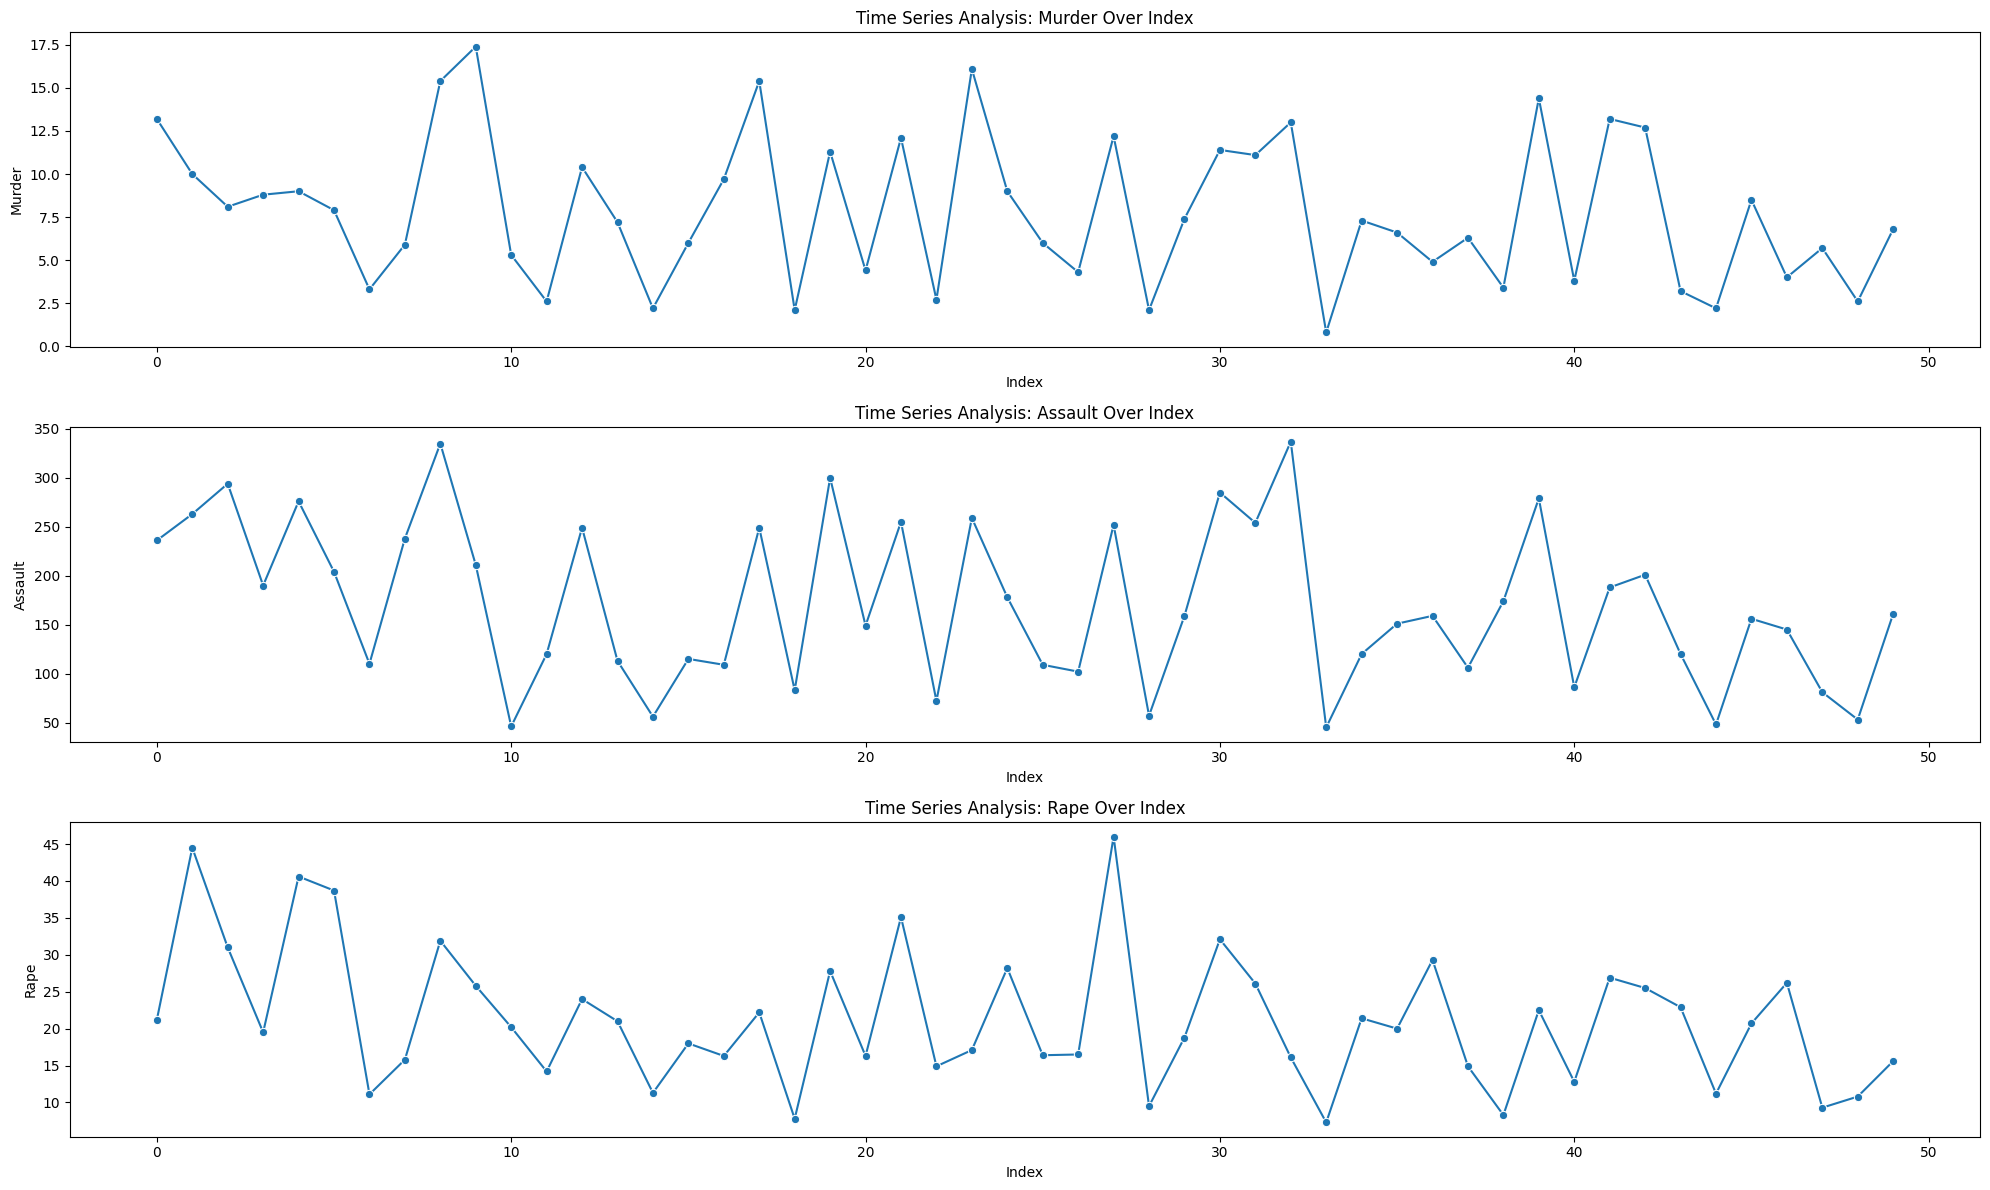

In [21]:
# 14. Time Series Analysis
print("\n--- Time Series Analysis ---\n")
time_series_cols = ['Murder', 'Assault', 'Rape']
fig, axes = plt.subplots(nrows=len(time_series_cols), ncols=1, figsize=(20, 4 * len(time_series_cols)))

# Loop through each numerical column and create a line plot
for ax, col in zip(axes, time_series_cols):
    sns.lineplot(x=df.index, y=col, data=df, marker='o', ax=ax)
    ax.set_title(f'Time Series Analysis: {col} Over Index')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [23]:
# Time-Based Indexing and Resampling
print("\n--- Time Series Indexing and Resampling ---\n")
df['Time'] = pd.date_range(start='2024-01-01', periods=len(df), freq='ME')  # Adding a synthetic time column

# Set 'Time' as the index
df.set_index('Time', inplace=True)

# Ensure to drop all non-numerical columns before resampling
df_numerical = df.select_dtypes(include=[np.number])

# Resample the data annually and calculate the mean for numerical columns
resampled_df = df_numerical.resample('Y').mean()  # Use 'Y' for year-end frequency
print("Resampled Data (Yearly):\n", resampled_df.head())


--- Time Series Indexing and Resampling ---

Resampled Data (Yearly):
               Murder     Assault   UrbanPop       Rape
Time                                                  
2024-12-31  8.908333  210.250000  69.250000  26.208333
2025-12-31  8.300000  167.416667  64.666667  19.316667
2026-12-31  7.600000  170.750000  66.583333  21.533333
2027-12-31  6.858333  145.250000  62.083333  19.208333
2028-12-31  4.700000  107.000000  63.000000  13.200000


<ipython-input-23-008858aa3858>:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled_df = df_numerical.resample('Y').mean()  # Use 'Y' for year-end frequency


In [24]:
# 15. 1D Statistical Data Analysis for Numerical Variables
print("\n--- 1D Statistical Data Analysis ---\n")
for var in numerical_columns:
    x = df[var].dropna()
    print(f"Variable: {var}")
    print(f"Mean: {x.mean()}")
    print(f"Median: {x.median()}")
    print("Quantiles (Deciles):")
    print(x.quantile(np.linspace(0, 1, 11)))
    print("Percentiles:")
    print(x.quantile([0.25, 0.5, 0.75]))
    print(f"Range: {x.min()} - {x.max()}")
    print(f"Interquartile Range (IQR): {x.quantile(0.75) - x.quantile(0.25)}")
    print(f"Variance: {x.var()}")
    print(f"Standard Deviation: {x.std()}")
    print(f"Skewness: {skew(x)}")
    print(f"Kurtosis: {kurtosis(x)}")
    print("\n")


--- 1D Statistical Data Analysis ---

Variable: Murder
Mean: 7.788
Median: 7.25
Quantiles (Deciles):
0.0     0.80
0.1     2.56
0.2     3.38
0.3     4.75
0.4     6.00
0.5     7.25
0.6     8.62
0.7    10.12
0.8    12.12
0.9    13.32
1.0    17.40
Name: Murder, dtype: float64
Percentiles:
0.25     4.075
0.50     7.250
0.75    11.250
Name: Murder, dtype: float64
Range: 0.8 - 17.4
Interquartile Range (IQR): 7.175
Variance: 18.97046530612245
Standard Deviation: 4.355509764209288
Skewness: 0.3820378489719802
Kurtosis: -0.8646713489582352


Variable: Assault
Mean: 170.76
Median: 159.0
Quantiles (Deciles):
0.0     45.0
0.1     56.9
0.2     98.8
0.3    112.1
0.4    135.0
0.5    159.0
0.6    188.8
0.7    236.6
0.8    254.2
0.9    279.6
1.0    337.0
Name: Assault, dtype: float64
Percentiles:
0.25    109.0
0.50    159.0
0.75    249.0
Name: Assault, dtype: float64
Range: 45 - 337
Interquartile Range (IQR): 140.0
Variance: 6945.165714285717
Standard Deviation: 83.33766084001708
Skewness: 0.2273178665


--- Frequency Distribution and Plots for Numerical Variables ---

Frequency Distribution for Murder:
 Murder
13.2    2
2.2     2
9.0     2
15.4    2
2.1     2
2.6     2
6.0     2
11.1    1
13.0    1
0.8     1
7.3     1
6.6     1
4.9     1
3.4     1
6.3     1
7.4     1
14.4    1
3.8     1
12.7    1
3.2     1
8.5     1
4.0     1
5.7     1
11.4    1
2.7     1
12.2    1
4.3     1
8.1     1
8.8     1
7.9     1
3.3     1
5.9     1
17.4    1
5.3     1
10.4    1
7.2     1
9.7     1
11.3    1
4.4     1
12.1    1
10.0    1
16.1    1
6.8     1
Name: count, dtype: int64


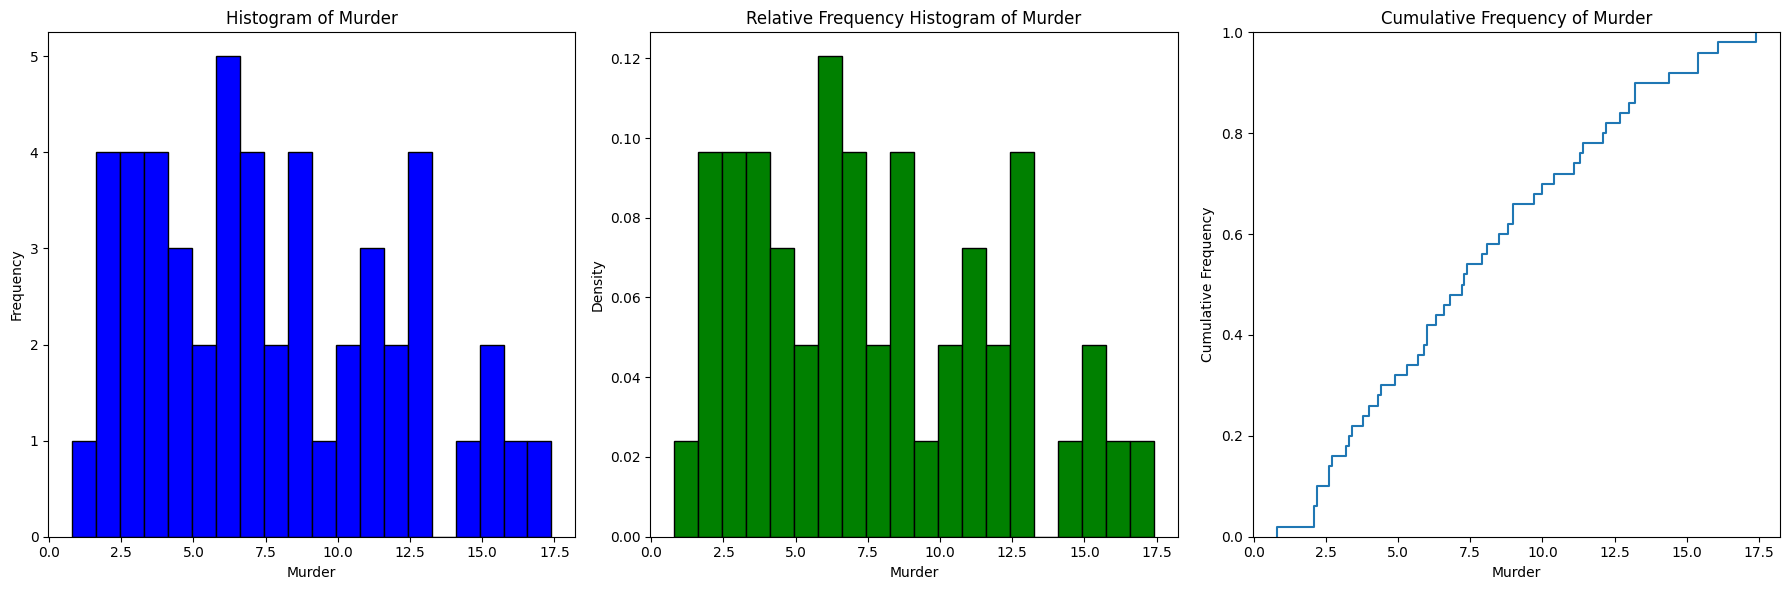

Frequency Distribution for Assault:
 Assault
120    3
249    2
159    2
109    2
174    1
57     1
285    1
254    1
337    1
45     1
151    1
106    1
236    1
102    1
279    1
86     1
188    1
201    1
48     1
156    1
145    1
81     1
53     1
252    1
259    1
178    1
263    1
294    1
190    1
276    1
204    1
110    1
238    1
335    1
211    1
46     1
113    1
56     1
115    1
83     1
300    1
149    1
255    1
72     1
161    1
Name: count, dtype: int64


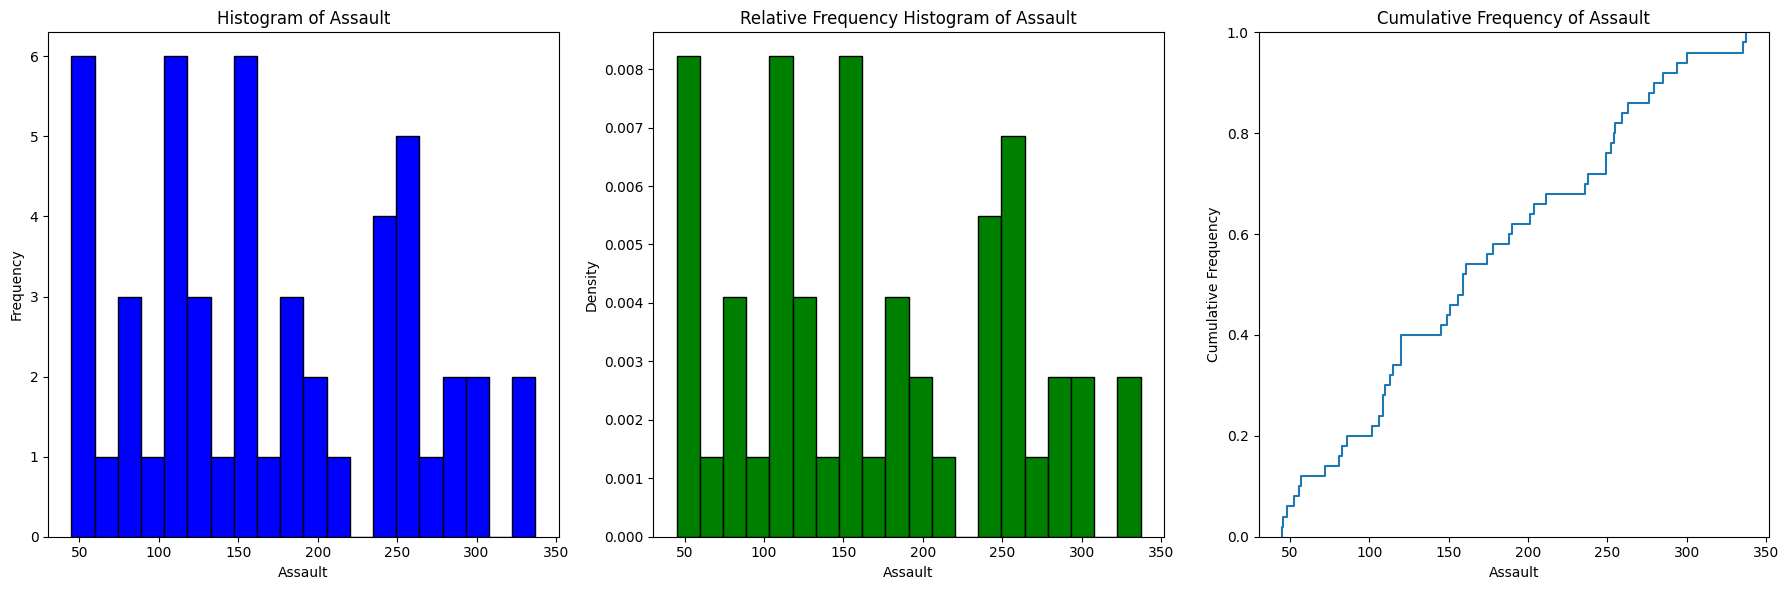

Frequency Distribution for UrbanPop:
 UrbanPop
66    4
80    4
70    2
44    2
48    2
72    2
60    2
83    2
67    2
45    2
58    1
89    1
86    1
68    1
75    1
81    1
87    1
59    1
32    1
63    1
73    1
56    1
74    1
62    1
53    1
85    1
51    1
52    1
57    1
65    1
54    1
77    1
78    1
91    1
50    1
39    1
Name: count, dtype: int64


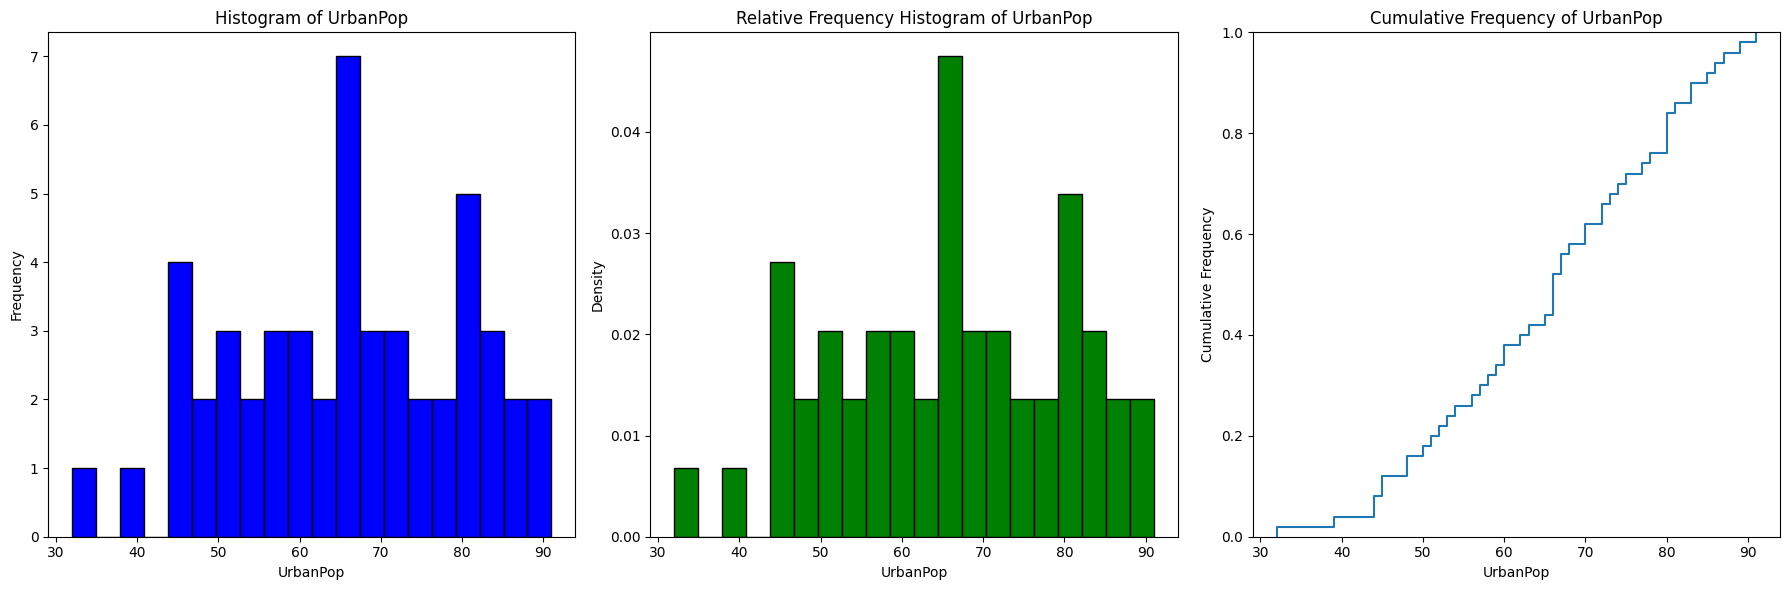

Frequency Distribution for Rape:
 Rape
14.9    2
16.3    2
21.2    1
29.3    1
9.5     1
18.8    1
32.1    1
26.1    1
16.1    1
7.3     1
21.4    1
20.0    1
8.3     1
16.5    1
22.5    1
12.8    1
26.9    1
25.5    1
22.9    1
11.2    1
20.7    1
26.2    1
9.3     1
10.8    1
46.0    1
16.4    1
44.5    1
28.2    1
31.0    1
19.5    1
40.6    1
38.7    1
11.1    1
15.8    1
31.9    1
25.8    1
20.2    1
14.2    1
24.0    1
21.0    1
11.3    1
18.0    1
22.2    1
7.8     1
27.8    1
35.1    1
17.1    1
15.6    1
Name: count, dtype: int64


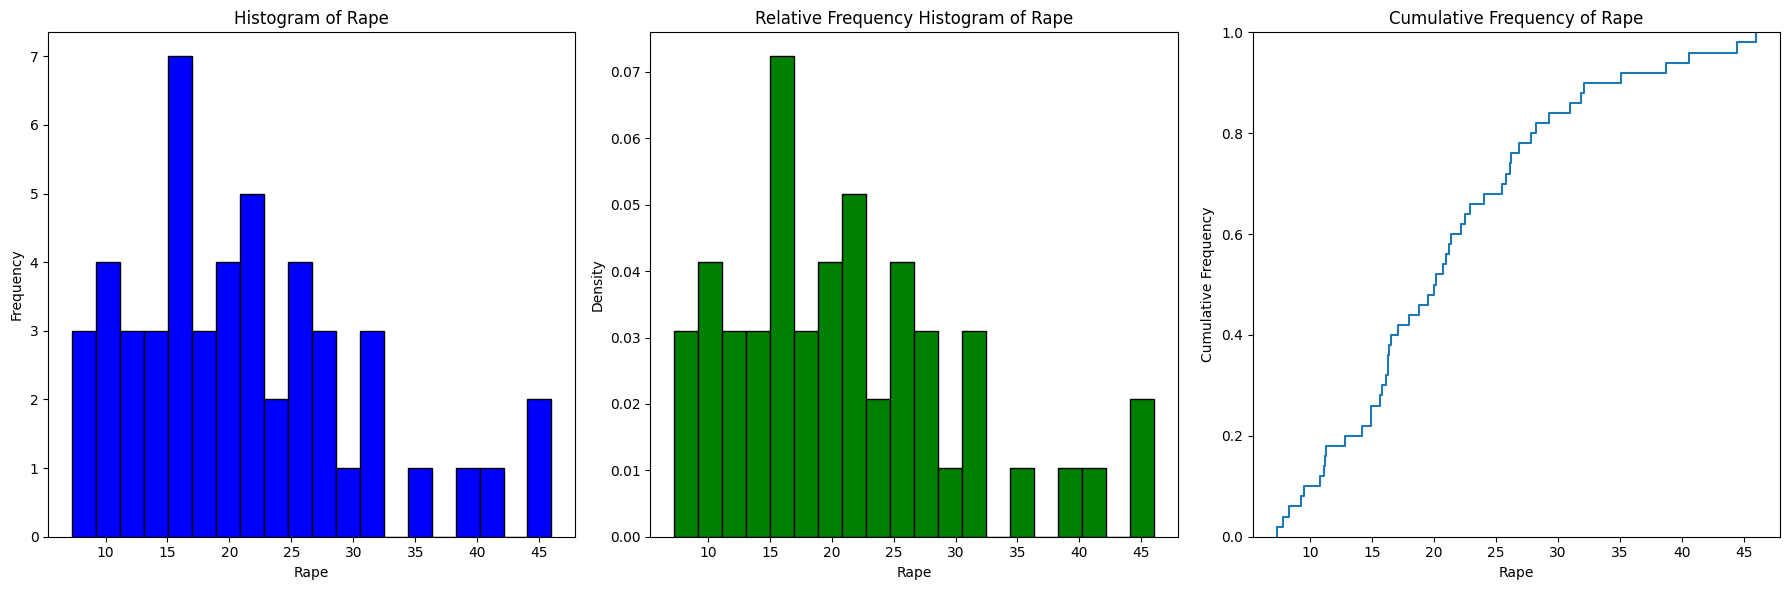

In [25]:
# 16. Frequency Distribution and Plots for Numerical Variables
print("\n--- Frequency Distribution and Plots for Numerical Variables ---\n")
for var in numerical_columns:
    x = df[var].dropna()
    freq_table = x.value_counts()
    print(f"Frequency Distribution for {var}:\n", freq_table)

    # Create a figure with 1 row and 3 columns for subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Histogram
    axes[0].hist(x, bins=20, color='blue', edgecolor='black')
    axes[0].set_title(f"Histogram of {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')

    # Relative Frequency Histogram
    axes[1].hist(x, bins=20, density=True, color='green', edgecolor='black')
    axes[1].set_title(f"Relative Frequency Histogram of {var}")
    axes[1].set_xlabel(var)
    axes[1].set_ylabel('Density')

    # Cumulative Frequency Distribution
    sns.ecdfplot(x, ax=axes[2])
    axes[2].set_title(f"Cumulative Frequency of {var}")
    axes[2].set_xlabel(var)
    axes[2].set_ylabel('Cumulative Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()


--- Categorical Variables Analysis ---



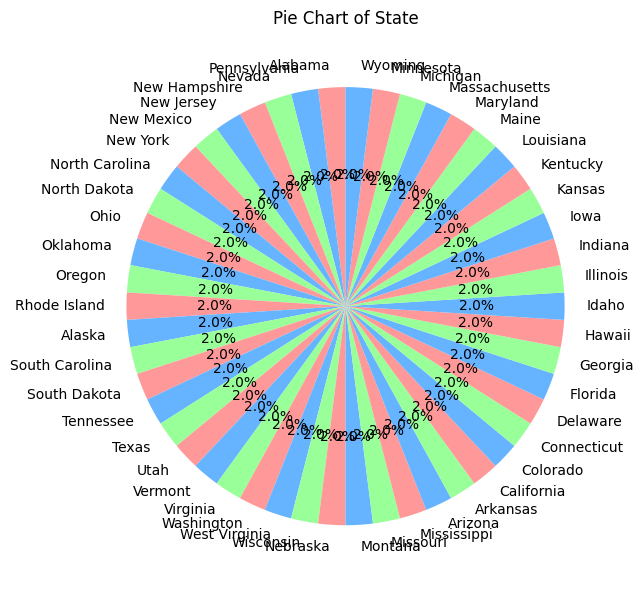

In [26]:
#17. Categorical Variables Analysis
print("\n--- Categorical Variables Analysis ---\n")
categorical_vars = ['State']

# Check if there is more than one categorical variable
if len(categorical_vars) > 1:
    fig, axes = plt.subplots(1, len(categorical_vars), figsize=(18, 6))
else:
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))
    axes = [axes]  # Convert to a list for consistent indexing

for i, var in enumerate(categorical_vars):
    x = df[var].value_counts()
    ax = axes[i]
    x.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'], ax=ax)
    ax.set_title(f"Pie Chart of {var}")
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

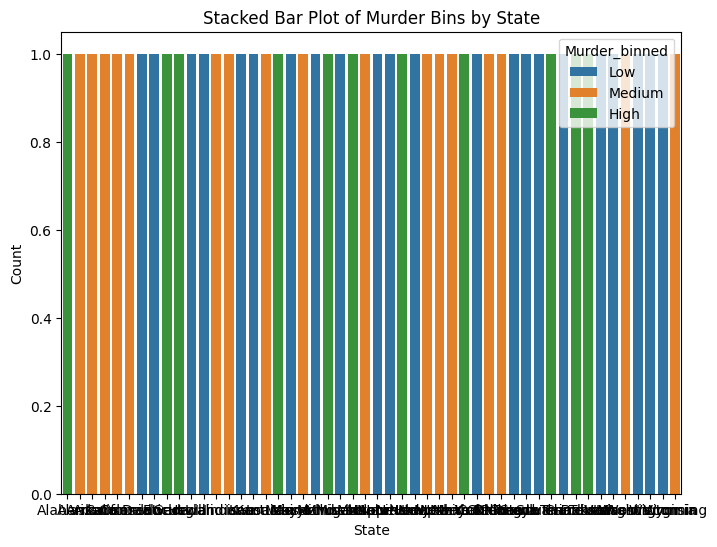

In [27]:
# 18. Stacked Bar Plot for Categorical Variables
plt.figure(figsize=(8, 6))
sns.countplot(x='State', hue='Murder_binned', data=df)
plt.title("Stacked Bar Plot of Murder Bins by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

In [28]:
# 19. Contingency Tables
print("\n--- Contingency Tables ---\n")
categorical_vars = ['State']

# Create tables between numerical and categorical variables
for num_var in numerical_columns:
    for cat_var in categorical_vars:
        table = pd.crosstab(pd.cut(df[num_var], bins=4), df[cat_var])
        print(f"Contingency Table between {num_var} and {cat_var}:\n")
        print(table)
        print("\n")


--- Contingency Tables ---

Contingency Table between Murder and State:

State          Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
Murder                                                                    
(0.783, 4.95]        0       0        0         0           0         0   
(4.95, 9.1]          0       0        1         1           1         1   
(9.1, 13.25]         1       1        0         0           0         0   
(13.25, 17.4]        0       0        0         0           0         0   

State          Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
Murder                                                  ...                 
(0.783, 4.95]            1         0        0        0  ...             1   
(4.95, 9.1]              0         1        0        0  ...             0   
(9.1, 13.25]             0         0        0        0  ...             0   
(13.25, 17.4]            0         0        1        1  ...             0   

State       

In [29]:
# 20. Chi-square Test for Independence
print("\n--- Chi-square Test for Independence ---\n")
table = pd.crosstab(df['Murder_binned'], df['State'])
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square Test Results:")
print(f"Chi2 Statistic: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")
print("\n")


--- Chi-square Test for Independence ---

Chi-square Test Results:
Chi2 Statistic: 100.0, p-value: 0.42486667820276586, Degrees of Freedom: 98
Expected Frequencies:
[[0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44
  0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44
  0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44
  0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44]
 [0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34
  0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34
  0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34
  0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.34]
 [0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22
  0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22
  0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22
  0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22]]





--- Scatter Plots for Numerical Variables ---



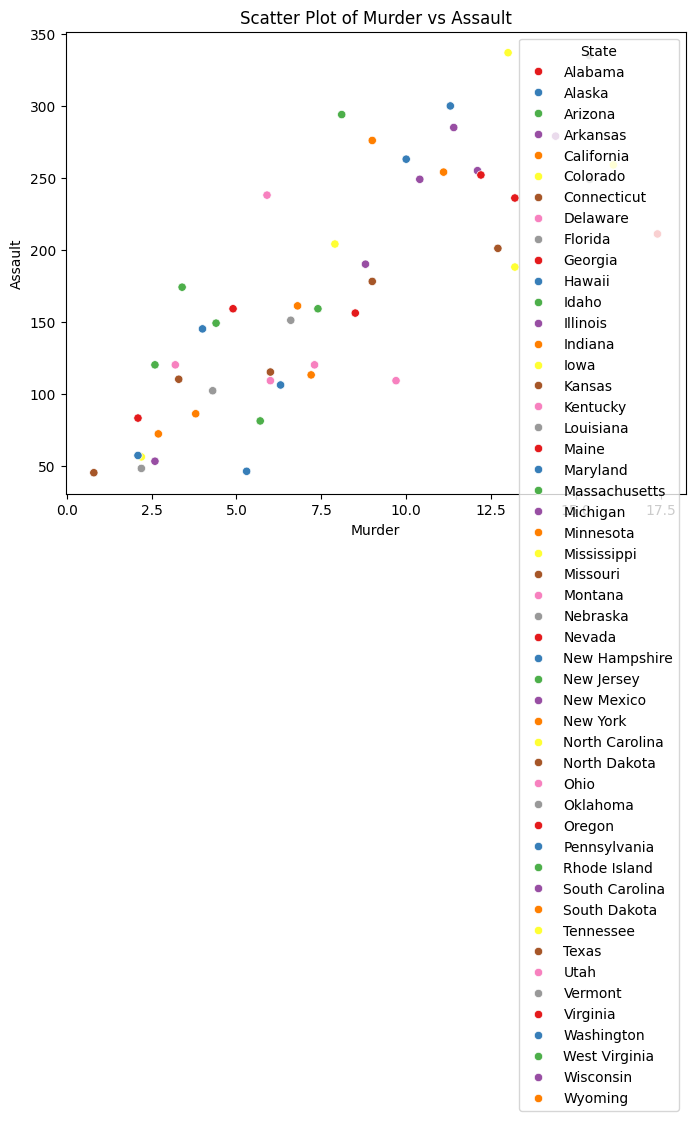

In [30]:
# 21. Scatter Plots for Numerical Variables
print("\n--- Scatter Plots for Numerical Variables ---\n")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Murder', y='Assault', data=df, hue='State', palette='Set1')
plt.title('Scatter Plot of Murder vs Assault')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()


--- Dot Charts for Numerical Variables ---



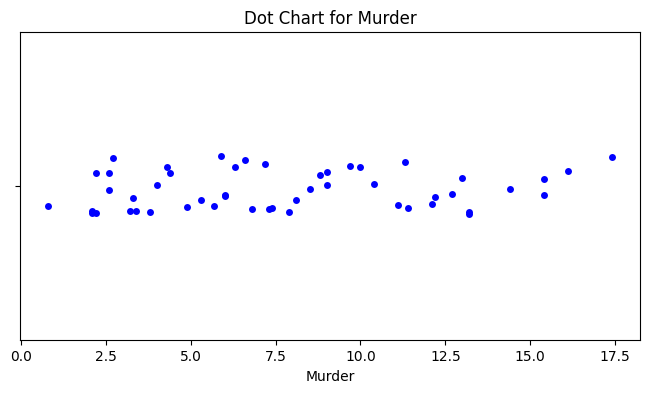

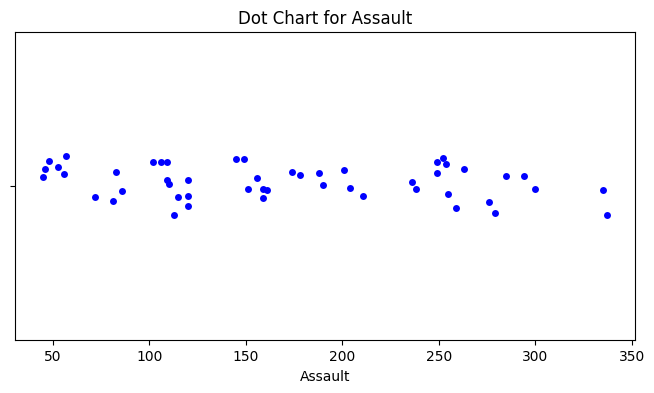

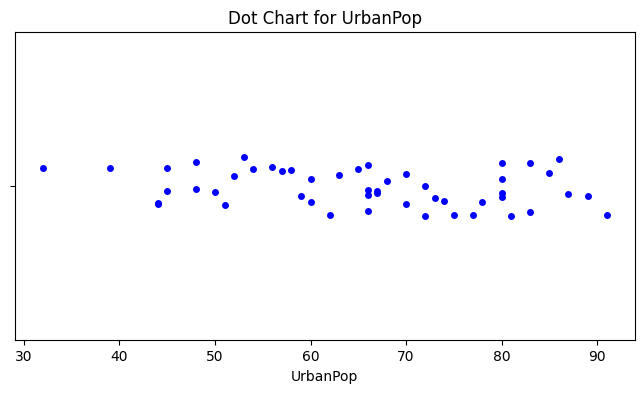

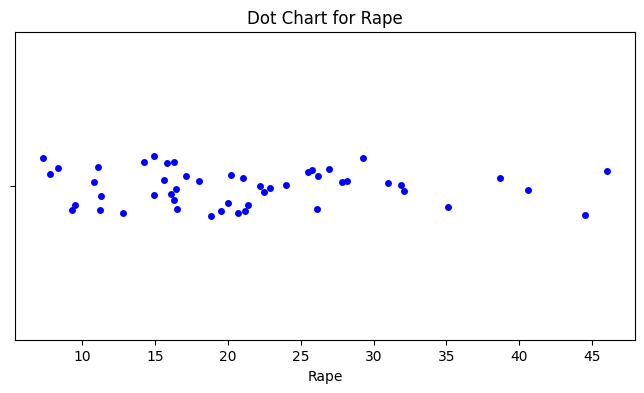

In [31]:
# 22. Dot Charts for Numerical Variables
print("\n--- Dot Charts for Numerical Variables ---\n")
for var in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.stripplot(x=var, data=df, jitter=True, color='blue')
    plt.title(f'Dot Chart for {var}')
    plt.xlabel(var)
    plt.show()


--- 3D Bar Plot for Categorical Relationships ---



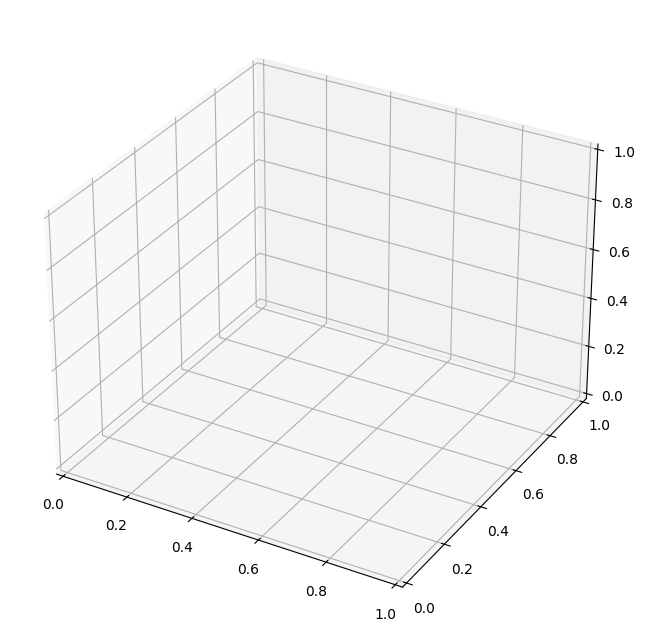

In [32]:
# 23. 3D Bar Plot for Categorical Relationships
print("\n--- 3D Bar Plot for Categorical Relationships ---\n")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

In [33]:
# Create a 3D bar plot with 'State', 'Murder_binned' data
states = df['State'].cat.categories
murder_bins = df['Murder_binned'].cat.categories
x, y = np.meshgrid(np.arange(len(states)), np.arange(len(murder_bins)))
z = np.zeros_like(x, dtype=float)

for i, state in enumerate(states):
    for j, murder_bin in enumerate(murder_bins):
        z[j, i] = len(df[(df['State'] == state) & (df['Murder_binned'] == murder_bin)])

ax.bar3d(x.flatten(), y.flatten(), np.zeros_like(z.flatten()), 1, 1, z.flatten(), color=cm.viridis(z.flatten() / max(z.flatten())))
ax.set_xlabel('State')
ax.set_ylabel('Murder Binned')
ax.set_zlabel('Count')
ax.set_title('3D Bar Plot for State and Murder Bins')
plt.show()

In [34]:
# Handling missing values
df.dropna(inplace=True)

# Selecting numerical columns
data = df.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

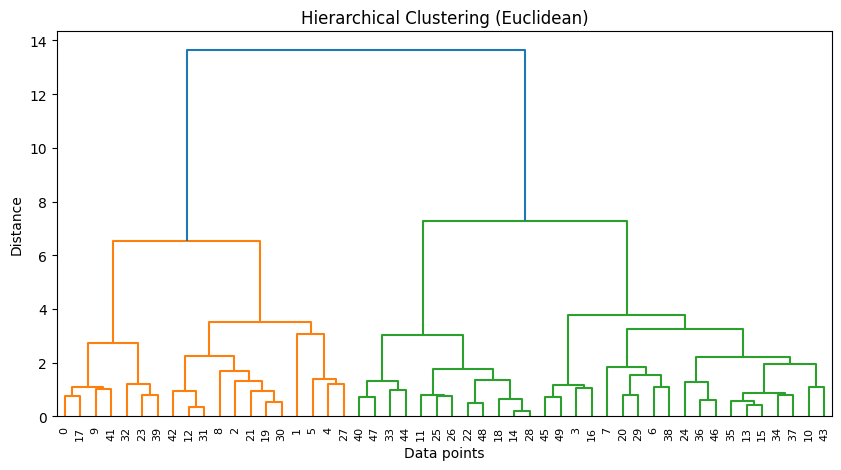

In [35]:
# Hierarchical Clustering - Euclidean
euc_linkage = linkage(data_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(euc_linkage)
plt.title('Hierarchical Clustering (Euclidean)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

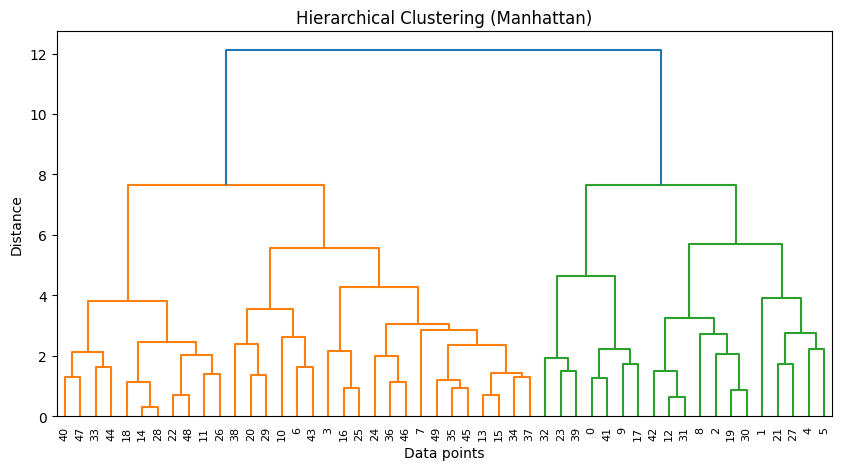

In [36]:
# Hierarchical Clustering - Manhattan
man_linkage = linkage(data_scaled, method='complete', metric='cityblock')
plt.figure(figsize=(10, 5))
dendrogram(man_linkage)
plt.title('Hierarchical Clustering (Manhattan)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

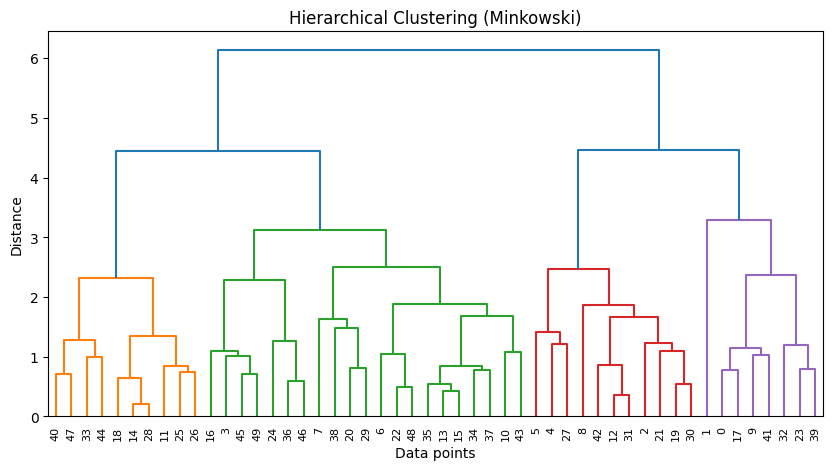

In [37]:
# Hierarchical Clustering - Minkowski
mink_linkage = linkage(data_scaled, method='complete', metric='minkowski')
plt.figure(figsize=(10, 5))
dendrogram(mink_linkage)
plt.title('Hierarchical Clustering (Minkowski)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [38]:
# K-Means Clustering - Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

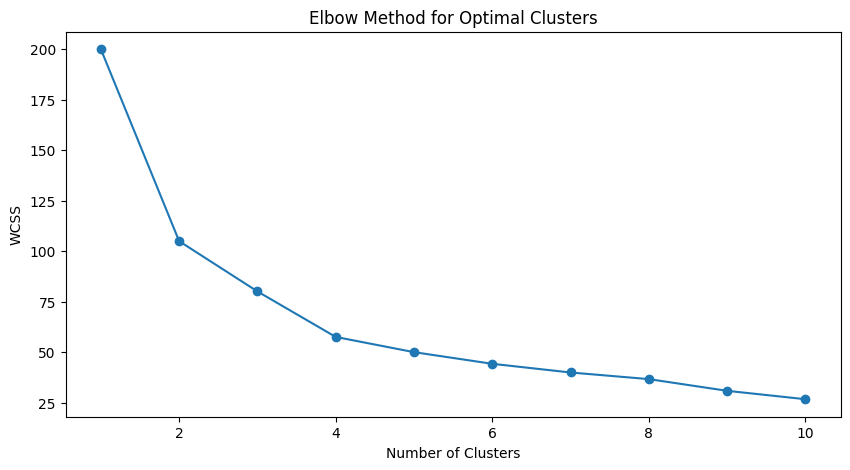

In [39]:
# Plot Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
# Optimal clusters based on Elbow Method
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

# Adding cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

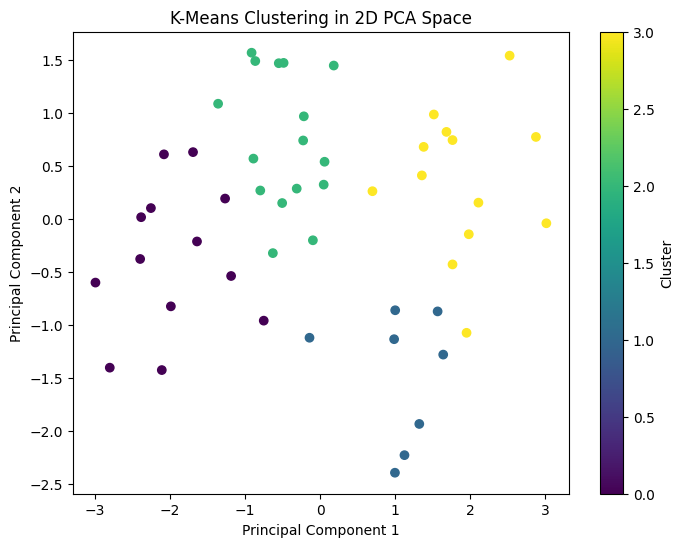

In [41]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [42]:
# Linear Regression to predict 'UrbanPop'
X = df[['Murder', 'Assault', 'Rape']]
y = df['UrbanPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predicting and evaluating
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error (MSE): 141.15773666533758
R-squared (R2): 0.10795161359114269
Model Coefficients: [-1.42629953  0.09839946  0.39685725]
Model Intercept: 52.20549817372013


In [46]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(data_scaled)
df['Spectral_Cluster'] = spectral_labels

In [47]:
# Expectation-Maximization using Gaussian Mixture
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
df['EM_Cluster'] = gmm_labels

In [48]:
# Minimum Spanning Tree Clustering using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
agglo_labels = agglo.fit_predict(data_scaled)
df['Agglomerative_Cluster'] = agglo_labels

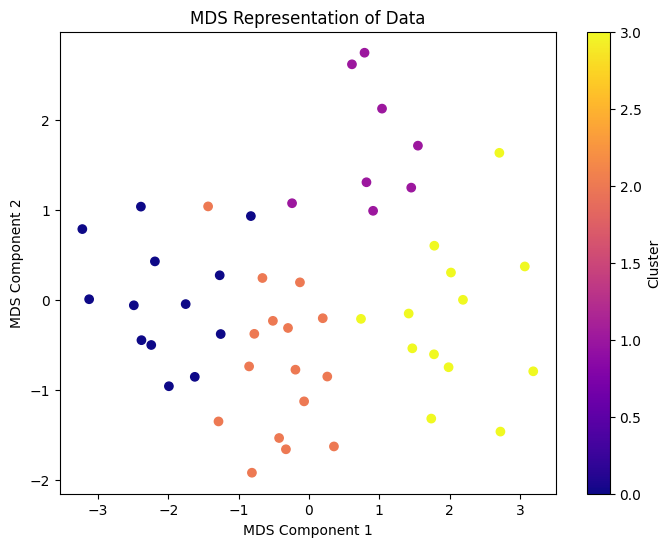

In [49]:
# Dimensionality Reduction using MDS
mds = MDS(n_components=2, random_state=42)
mds_components = mds.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(mds_components[:, 0], mds_components[:, 1], c=df['Cluster'], cmap='plasma')
plt.title('MDS Representation of Data')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [50]:
# Reinforcement Learning Conceptual Overview
print("\nReinforcement Learning Overview:\n")
print("Reinforcement learning is a type of machine learning where an agent learns to make decisions by performing actions and receiving rewards. Unlike supervised learning, where labeled data is provided, reinforcement learning relies on the reward feedback to learn optimal policies.")


Reinforcement Learning Overview:

Reinforcement learning is a type of machine learning where an agent learns to make decisions by performing actions and receiving rewards. Unlike supervised learning, where labeled data is provided, reinforcement learning relies on the reward feedback to learn optimal policies.
